# Worked Problem #4 - Laplace's equation

We will be investigating Laplace's equation for various similar boundary conditions using a very long wire. It is unclear to me what real-world system matches these electrostatic conditions, however they are a great opportunity to show off the types of results polar coordinates can have with the Laplace equation. Our investigation will first introduce the two key equations - Laplace and seperation of variables for potentials, then derive a potential result for the laplace equation, and then apply boundary conditions to find unique solutions to Laplace's equation.

For each boundary condition we will also visualize with some parameters to help develop an understanding of the nature of our results.

Our largest assumption is the long-wire assumption, which is needed to assume potential is independent of $z$, simplifying many of our equations. This is reasonable since error compared between finite and infinite (long) wires isn't a concern for our purposes. Otherwise, we also assume that this electrostatic situation can be created and voltage can be perfectly controlled. In a real system such control is difficult (and not cheap) to observe. 


1. Relevant equations

$$
V(r=a, \theta) = V_0 \cos(\theta) \\
$$

In cylindrical coordinates, the laplace equation is

$$
\nabla^2 V= \frac{1}{r} \frac{\partial}{\partial r} \left(r \frac{\partial V}{\partial r} \right) + \frac{1}{r^2}\frac{\partial^2 V}{\partial \theta^2} + \frac{\partial^2 V}{\partial z^2}  =0
$$

This comes from measure in cylindrical coordinates - the rate of change of each variable depends on the value of the others. 

To solve Laplace's equation, we assume that voltage is seperable $V(r, \theta, z) = R(r) \Theta(\theta) Z(z)$, a technique we learned in class. For our system, the inside of a long thin cylinder, we do not need to worry about the $z$ dimension $Z(z) = 1$. While our boundary condition depends entirely on $\theta$, it only describes the potential for $r=a$, while we will be finding the result for $r<a$.


2. Solving the equations

Using our separation, we can make some headway towards solving laplace's equation.

$$
\nabla^2 V = \nabla^2(R(r)\Theta(\theta)) = 
\frac{\Theta(\theta)}{r} \frac{\partial}{\partial r} \left(r \frac{\partial R(r)}{\partial r} \right) + 
\frac{R(r)}{r^2}\frac{\partial^2 \Theta(\theta)}{\partial \theta^2} 
=0
$$

The next step is to seperate by variable dependence

$$
\frac{r}{R(r)}\frac{\partial}{\partial r} \left(r \frac{\partial R(r)}{\partial r} \right) 
=
-\frac{1}{\Theta(\theta)} \frac{\partial^2 \Theta(\theta)}{\partial \theta^2}
$$

Now each half is constant with respect to one variable, so we have

$$
\frac{\partial}{\partial r} \left(r \frac{\partial R(r)}{\partial r} \right) = k^2 \frac{R(r)}{r} \\
\frac{\partial^2 \Theta(\theta)}{\partial \theta^2} = -k^2\Theta(\theta)

$$

We choose the negative sign to go with $\Theta$ due to our boundary condition clearly favoring a sinusoidal result for $\Theta$

While the second equation is one we've tackled, the first equation isn't quite as pretty. Using the product rule,

$$
\frac{r}{R(r)}\frac{\partial}{\partial r} \left(r \frac{\partial R(r)}{\partial r} \right) = r^2 R'' + rR' = k^2 R \\
r^2 R'' + rR'- k^2 R =0 \\
R'' + \frac{1}{r} R - \frac{k^2}{r^2} R = 0
$$
This Second Order Linear Differential Equation (SOLDE) doesn't have a simple formula to solve, but we can guess values to try to find a function that fits. We can also use $-k^2$, but we'd rather save that for $\Theta$.

Guess: $R = r^n$

$$
R'' = n(n-1)r^{n-2} =( n^2-n) r^{n-2}\\
R' = nr^{n-1} \\
R = r^n
$$
Plugging this into our SOLDE gives us
$$
(n^2-n)r^{n-2} +
\frac{n}{r}r^{n-1} -
\frac{k^2}{r^2}r^n = 0 \\
r^{n-2}(n^2-n+n-k^2) = 0 \\
n^2 = k^2
$$

Well that seems nice. It appears our result is $R(r) = r^k$. Let's keep it in our pocket for now. Uniqueness requires matching to initial conditions, so we'll see if this solution fits our boundary conditions, and come back if we have difficulties


$\Theta$ is somewhat simpler; $\Theta = A \sin(k \theta) + B \cos(k \theta) $

This give us our potential

$$V(r, \theta) = A r^k \sin(k \theta) + Br^k\cos(k\theta)$$


3. Boundary Conditions


All that is left is applying our boundary conditions

$$
V(a, \theta) = V_0 \cos \theta \\
A = 0,\ B=\frac{V_0}{a},\ k = 1
$$

Thus we have our unique soulution!

$$
V(r, \theta) = \frac{V_0}{a}r\cos(\theta)
$$

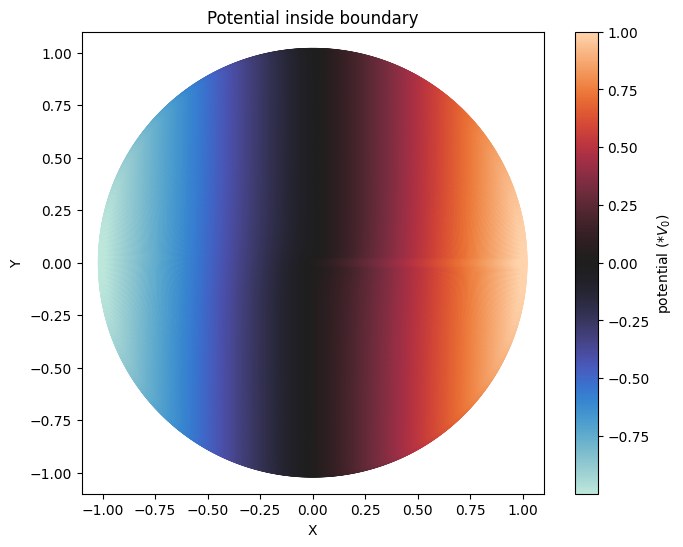

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, pi

V0 = 1
a = 1
params = [V0, a]

def phi(r, theta, params):
    v0, a = params
    return v0 * r * cos(theta) / a
n2 = 1000

r = np.linspace(0, a, n2)
theta = np.linspace(0, 2*pi - 2/(n2), n2) #-2/n2 to reduce overlap

R, Th = np.meshgrid(r, theta)

meshout = phi(R, Th, params)

def polar_to_catesian(r, theta):
    return r*np.cos(theta), r*np.sin(theta)

def make_plot_from_mesh(mesh):
    X, Y = polar_to_catesian(R, Th)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, Y, c=meshout, cmap='icefire')
    plt.colorbar(label=r'potential ($*V_0$)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Potential inside boundary')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

make_plot_from_mesh(meshout)


Let's unlock the frequency on our boundary condition.

$$
V(r=a, \theta) = \cos(k \theta) \\
A = 0,\ B = \frac{V_0}{a^k},\ k = k \\
V(r, \theta) = \frac{V_0}{a^k} r^k \cos(k \theta)
$$

It is clear that adding $k$ to our boundary condition not only modifies how voltage varies due to angle, but also radius


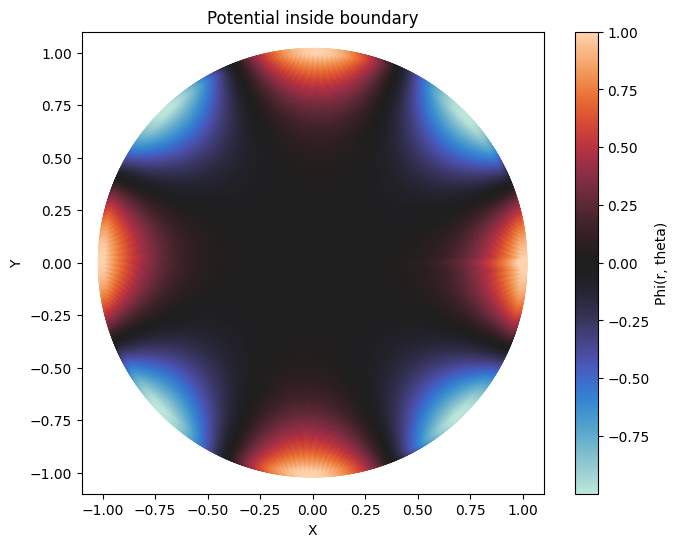

In [36]:
def phi(r, theta, params):
    v0, a, k = params
    return v0 * r**k * cos(k*theta) / a**k

V0 = 1
a = 1
k = 4
params = [V0, a, k]

n2 = 1000
r = np.linspace(0, a, n2)
theta = np.linspace(0, 2*pi - 2/(n2), n2)
R, Th = np.meshgrid(r, theta)
meshout = phi(R, Th, params)

make_plot_from_mesh(meshout)


As one would expect from the sine function, there are $k$ positive peaks and $k$ negative peaks

We can also try less than one full period, $k<1$

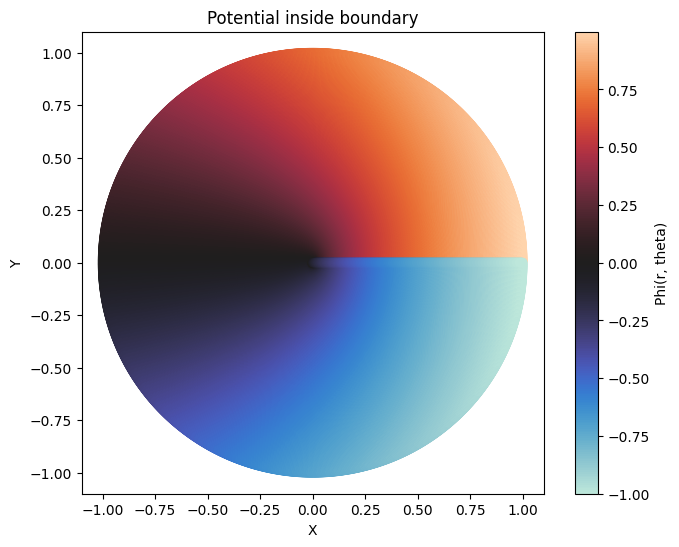

In [42]:
V0 = 1
a = 1
k = 1/2
params = [V0, a, k]


n2 = 1000
r = np.linspace(0, a, n2)
theta = np.linspace(0.005, 2*pi, n2) #again, trying to manage overlap/underlap
R, Th = np.meshgrid(r, theta)
meshout = phi(R, Th, params)

make_plot_from_mesh(meshout)


The discontinutiy in  $V$ causes an interesting result. I wonder which of our assumptions allows for this to occur? I believe this result is faulty since $\cos(x) \neq \cos(2\pi+x)$, so our results don't really makes sense. Let's stick with integer values of $k$ going forward. Let's check out a very large $k$

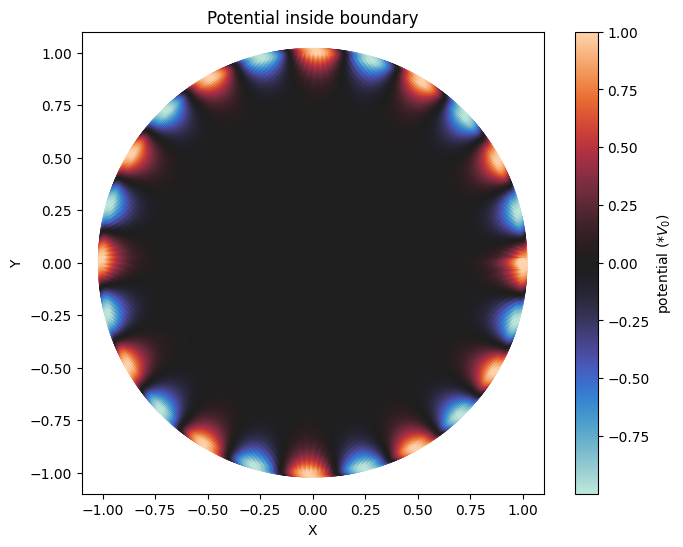

In [45]:
def phi(r, theta, params):
    v0, a, k = params
    return v0 * r**k * cos(k*theta) / a**k

V0 = 1
a = 1
k = 12
params = [V0, a, k]

n2 = 1000
r = np.linspace(0, a, n2)
theta = np.linspace(0, 2*pi - 2/(n2), n2)
R, Th = np.meshgrid(r, theta)
meshout = phi(R, Th, params)

make_plot_from_mesh(meshout)


This solution works at the limits as $V(0,\theta)=0$, there aren't any sudden jumps at any point. In a future work, we may also create electric fields associated with these potentials, as well as model moving charges, however this will suffice for this worked problem. We could also use forier analysis to model a more complex system, although that is not necessary for these boundary conditions.

4. Citations

Initial guess for the SOLDE was suggested in Professor Nagy's textbook

[https://users.math.msu.edu/users/gnagy/teaching/ode-2ed.pdf](https://users.math.msu.edu/users/gnagy/teaching/ode-2ed.pdf)